In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dir_path ='C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'
??pandas.cut()

Object `pandas.cut()` not found.


In [2]:
f_app_train = os.path.join(dir_path + 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(app_train[col].unique()) <= 2:
            app_train[col] = le.fit_transform(app_train[col])

app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEARS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']) / 365
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
data_employ = app_train[['TARGET','DAYS_EMPLOYED','YEARS_EMPLOYED']]
data_employ.head()

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
0,1,637.0,1.745205
1,0,1188.0,3.254795
2,0,225.0,0.616438
3,0,3039.0,8.326027
4,0,3038.0,8.323288


In [6]:
import seaborn as sns
bins = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50)])
data_employ['YEARS_EMPLOYED_GROUP'] = pd.cut(app_train['YEARS_EMPLOYED'], bins)
data_employ.head()

C:\Users\francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP
0,1,637.0,1.745205,"(0, 5]"
1,0,1188.0,3.254795,"(0, 5]"
2,0,225.0,0.616438,"(0, 5]"
3,0,3039.0,8.326027,"(5, 10]"
4,0,3038.0,8.323288,"(5, 10]"


In [18]:
print(data_employ['YEARS_EMPLOYED_GROUP'].value_counts())
employ_group = data_employ.groupby('YEARS_EMPLOYED_GROUP').mean()
print(employ_group.index.astype(str))
employ_group


(0, 5]      136309
(5, 10]      64872
(10, 15]     27549
(15, 20]     10849
(20, 25]      6243
(25, 30]      3308
(30, 35]      1939
(35, 40]       832
(40, 45]       210
(45, 50]        24
Name: YEARS_EMPLOYED_GROUP, dtype: int64
Index(['(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]', '(25, 30]',
       '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]'],
      dtype='object', name='YEARS_EMPLOYED_GROUP')


,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_EMPLOYED_GROUP,,,
"(0, 5]",0.105708,864.340763,2.368057
"(5, 10]",0.073714,2630.224689,7.206095
"(10, 15]",0.057752,4466.899670,12.238081
"(15, 20]",0.048484,6306.860448,17.279070
"(20, 25]",0.047573,8092.875701,22.172262
"(25, 30]",0.039903,9961.437122,27.291609
"(30, 35]",0.041258,11791.751418,32.306168
"(35, 40]",0.019231,13517.634615,37.034615
"(40, 45]",0.004762,15325.461905,41.987567


(Text(0.5, 1.0, 'Failure to repay by employ group'),
 Text(0.5, 0, 'Employ(Years)'),
 Text(0, 0.5, 'Failure to repay(%)'))

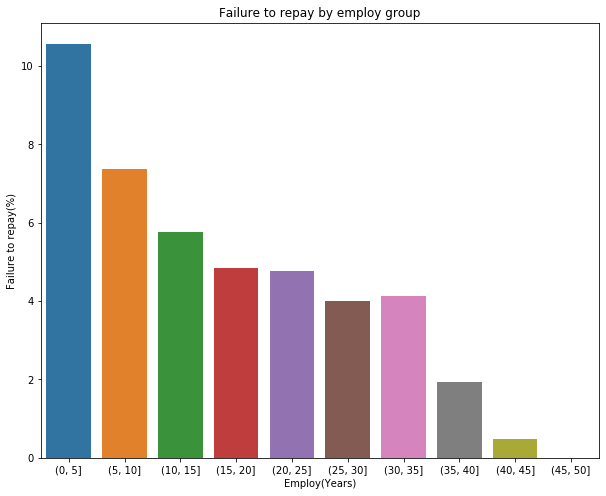

In [28]:
plt.figure(figsize = (10,8))

px = employ_group.index.astype(str)
py = 100*employ_group['TARGET']
sns.barplot(px,py)
plt.show

plt.title('Failure to repay by employ group'),plt.xlabel('Employ(Years)'),plt.ylabel('Failure to repay(%)')